# Seaborn - 고급 그래프
: Matplotlib의 기능과 스타일을 확장한 파이썬 시각 도구의 고급 버전
- 가장 현대식이라는 그래프 Seaborn (matlib필요) 

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Seaborn package 에서 제공하는 titanic 데이터셋 가져오기
import seaborn as sns

In [4]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 회귀선이 있는 산점도

In [5]:
import matplotlib.pyplot as plt

In [19]:
sns.set_style('darkgrid') # darkgrid , whitegrid , dark , white , ticks

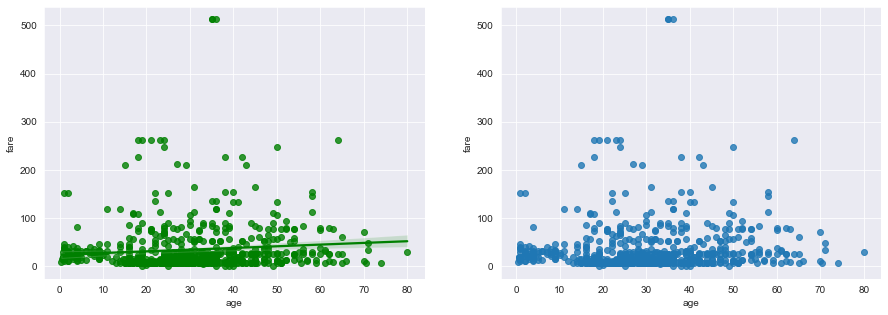

In [23]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# 선형 회귀선이 포함된 그래프 그리기 
sns.regplot(
    x = 'age' , 
    y = 'fare' , 
    data = titanic,
    ax = ax1, # ax1에 그림을 그릴거야
    color= 'green'
)

# 선형 회귀선이 미포함된 그래프 그리기
sns.regplot(
    x = 'age' , 
    y = 'fare' , 
    data = titanic,
    ax = ax2, # ax2에 그림을 그릴거야
    fit_reg = False,
)

plt.show()

---
### 히스토그램  /  커널밀도그래프
: 커널 밀도 함수는 그래프와 X축 사이의 면적이 1이 되도록 그리는 밀도 분포 함수
: 히스토그램은 전체적인 카운트 , 히스토그램과 커널밀도는 같은 의미의 그래프

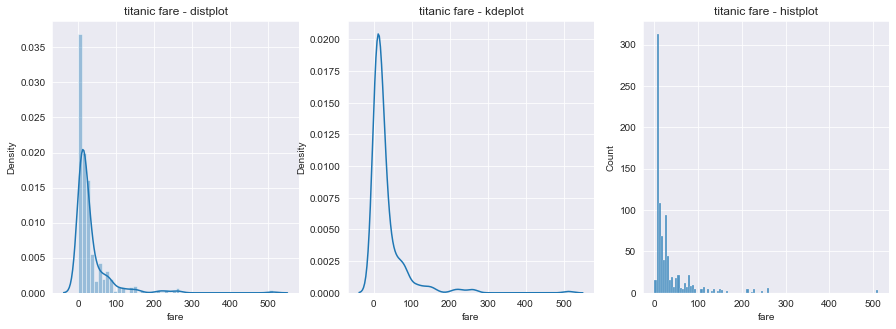

In [30]:
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# 히스토그램 / 커널 밀도
sns.distplot(titanic['fare'] , ax = ax1,)

# 커널 밀도 
sns.kdeplot(titanic['fare'] , ax = ax2)

# 히스토그램
sns.histplot(titanic['fare'] , ax = ax3) # (x = 'fare', data = titanic, ax = ax3)로 쓸 수 있음

# 차트 제목
ax1.set_title('titanic fare - distplot')
ax2.set_title('titanic fare - kdeplot')
ax3.set_title('titanic fare - histplot')

plt.show()

> fare(운임)가 대부분 100달러 미만에 집중 되어 있다.
<br>
> 어떤 내용을 표현하려는지에 따라 사용하는 그래프가 달라야 한다

---
### 히트맵(heatmap)
- 2개의 범주형 변수를 각각 x , y 축에 놓고 데이터를 매트릭스 형태로 분류

In [34]:
table = titanic.pivot_table(index=['sex'] , columns= ['class'] , aggfunc= 'size' ) # size : 갯수
# 성별 별 , 티켓 등급마다 몇명씩 탔는지 구분하겠다
table

class,First,Second,Third
sex,,,
female,94,76,144
male,122,108,347


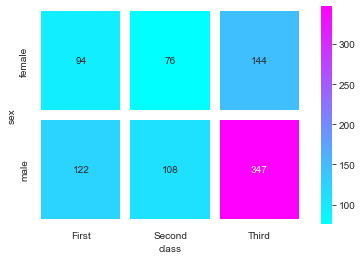

In [45]:
sns.heatmap(
    table, # data
    annot= True, # 숫자 표기
    fmt= 'd', # 지수로 볼거야 d , 실수 f , 
    linewidths= 10, # 간격
    cmap = 'cool',
    cbar= True , # 컬러바
)

plt.show()

> 컬러맵 참고 사이트
https://matplotlib.org/stable/tutorials/colors/colormaps.html

### 범주형 데이터의 산점도
- 범주형 변수에 들어 있는 각 범주별 데이터의 분포를 확인

In [46]:
sns.set_style('whitegrid')

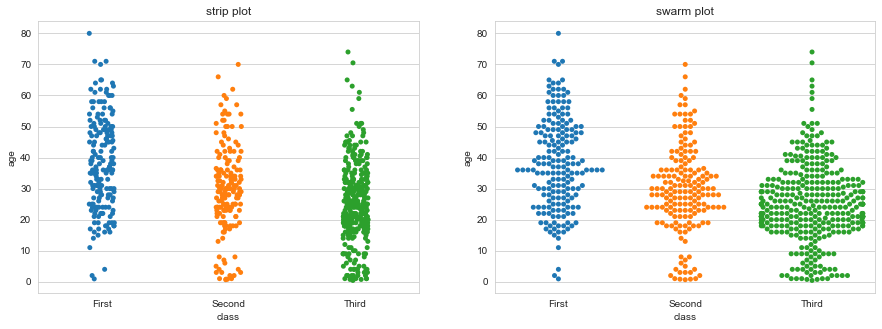

In [51]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1 , 2, 1)
ax2 = fig.add_subplot(1 , 2, 2)

sns.stripplot(
    x = 'class',
    y = 'age',
    data = titanic,
    ax = ax1,
) # 중복된 값을 알 수 없다는 단점이 있다.

# 중복 값도 볼 수 있는 그래프
sns.swarmplot(
    x = 'class',
    y = 'age',
    data = titanic,
    ax = ax2,
) 

# 차트 제목
ax1.set_title('strip plot')
ax2.set_title('swarm plot')

plt.show()

---
### 막대 그래프

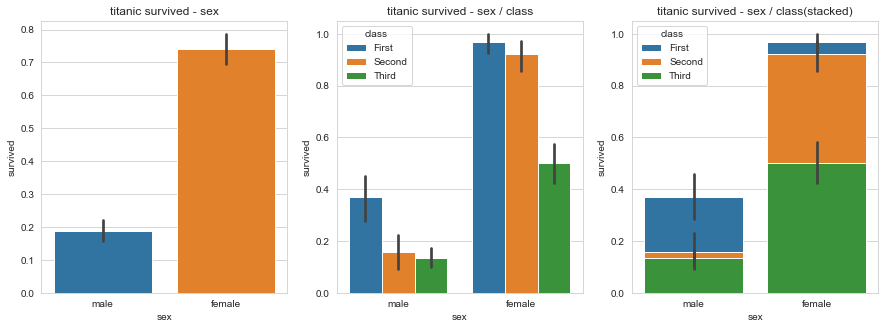

In [62]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1 , 3, 1)
ax2 = fig.add_subplot(1 , 3, 2)
ax3 = fig.add_subplot(1 , 3, 3)

# x , y 축의 변수 할당
sns.barplot(
    x = 'sex',
    y = 'survived',
    data = titanic,
    ax = ax1,
    # ci = 'sd', # 오차막대를 어떤거로 보여줄지 설정
) 
# 검은색 짝대기 등장 : 오차막대(error bar) , 95%의 신뢰구간 
# 기본 오차막대가 보여주는 값 : survived를 계산한 수치의 95% 신뢰 구간, male은 생존확율이 20% 정도고 막대기 만큼 오차가 있다. 
# 데이터가 띄엄띄엄 있으면 오차막대가 길어지고, 데이터의 밀도가 높으면 오차막대가 짧아진다  ~~데이터의 분포~~

# x, y, hue
sns.barplot(
    x = 'sex',
    y = 'survived',
    hue = 'class',
    data = titanic,
    ax = ax2,
) 
# stacked 누적
sns.barplot(
    x = 'sex',
    y = 'survived',
    hue = 'class',
    dodge = False, # stacked
    data = titanic,
    ax = ax3,
) 
# 누적 막대 그래프 
# hue로 나타낸 그래프를 겹쳐서 본것, 파란색은 위에 조금이 전부가 아니라 0.0부터 시작한 값임

ax1.set_title('titanic survived - sex')
ax2.set_title('titanic survived - sex / class')
ax3.set_title('titanic survived - sex / class(stacked)')

plt.show()

오차막대 (error bar)

### 빈도 그래프

In [63]:
sns.set_style('whitegrid')

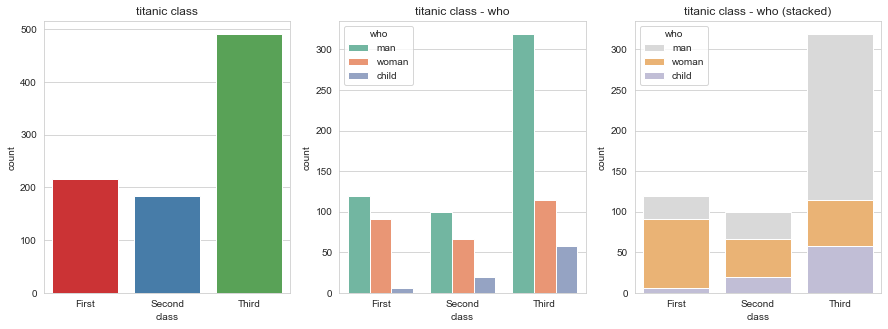

In [75]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1 , 3, 1)
ax2 = fig.add_subplot(1 , 3, 2)
ax3 = fig.add_subplot(1 , 3, 3)

# 기본값
# 우리가 원래 알고 있던 막대 그래프
sns.countplot(
    x = 'class',
    data = titanic,
    ax = ax1,
    palette= 'Set1'
)

# hue 사용
sns.countplot(
    x = 'class',
    hue = 'who',
    data = titanic,
    ax = ax2,
    palette= 'Set2'
)

# stacked
sns.countplot(
    x = 'class',
    hue = 'who',
    data = titanic,
    ax = ax3,
    palette= 'Set3_r', # 에러 한번 걸리면 컬러 팔레트 리스트 알려줌 ㅋㅋ  
    dodge=False,
)

ax1.set_title('titanic class')
ax2.set_title('titanic class - who')
ax3.set_title('titanic class - who (stacked)')

plt.show()

In [67]:
titanic.head()
# who 컬럼, man woman child

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


---
# 박스플롯 / 바이올린 그래프
- 박스플롯은 범주형 데이터의 분포와 주요 통계지표를 함께 제공하지만 데이터가 퍼져있는 분산의 정도를 알기 어렵다.
- 바이올린 그래프 : 박스 플롯에 커널 밀도 함수 그래프가 추가
; 바이올린 그래프가 한번에 잘 보여서 강사님 픽

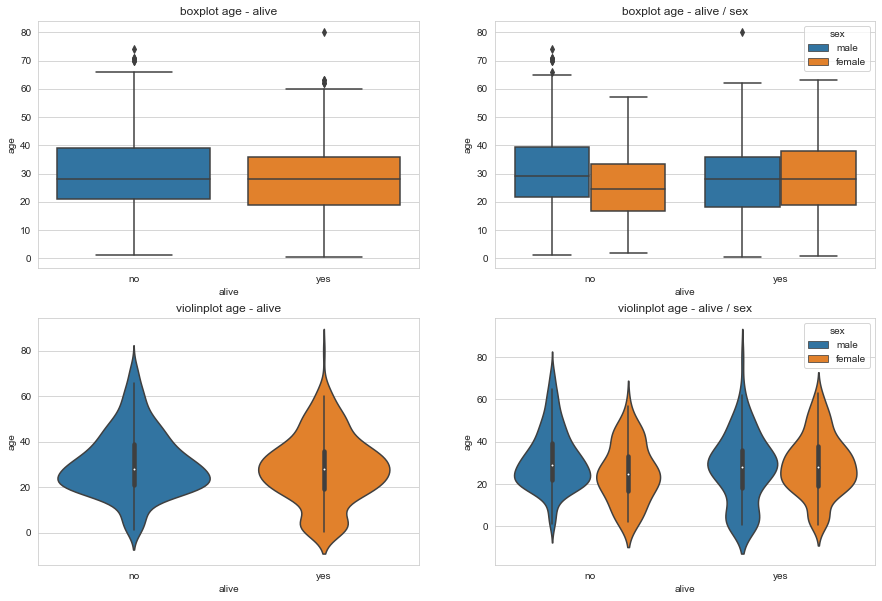

In [84]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2 , 2, 1)
ax2 = fig.add_subplot(2 , 2, 2)
ax3 = fig.add_subplot(2 , 2, 3)
ax4 = fig.add_subplot(2 , 2, 4)

# boxplot : 기본값
sns.boxplot(
    x = 'alive',
    y = 'age',
    data = titanic,
    ax = ax1,
) 
# boxplot : 기본값 + hue : sex 연령대별 성벌
sns.boxplot(
    x = 'alive',
    y = 'age',
    hue = 'sex',
    data = titanic,
    ax = ax2,
) 

# violinplot : 기본값
sns.violinplot(
    x = 'alive',
    y = 'age',
    data = titanic,
    ax = ax3,
) # 검은색 기둥 : 그쪽에 데이터가 몰려 있다
# violinplot : 기본값 + hue : sex 연령대별 성벌
sns.violinplot(
    x = 'alive',
    y = 'age',
    hue = 'sex',
    data = titanic,
    ax = ax4,
) 
# 밀도를 알 수 있다. 어디에 데이터가 몰려있는지

ax1.set_title('boxplot age - alive')
ax2.set_title('boxplot age - alive / sex')
ax3.set_title('violinplot age - alive')
ax4.set_title('violinplot age - alive / sex')

plt.show()

---
### 조인트 그래프
- 산점도를 기본으로 표시하고 각 축에 대한 히스토그램을 동시 제공

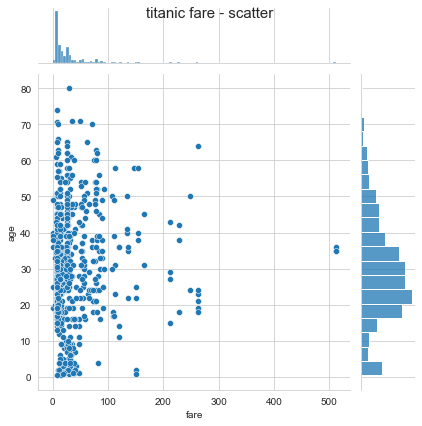

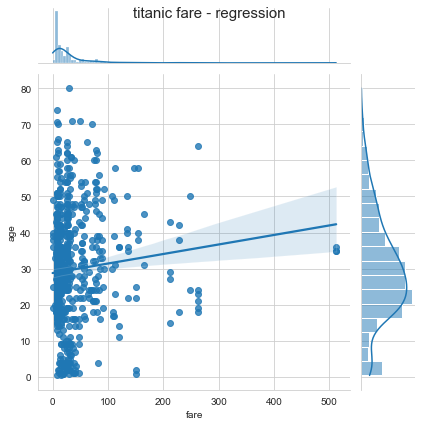

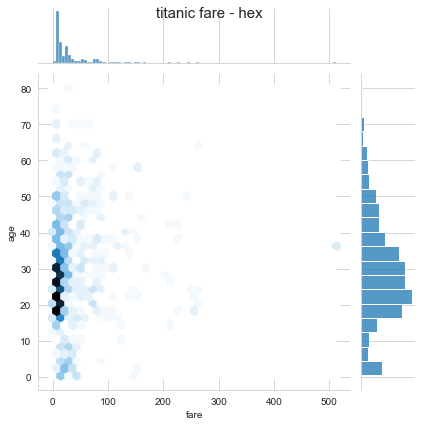

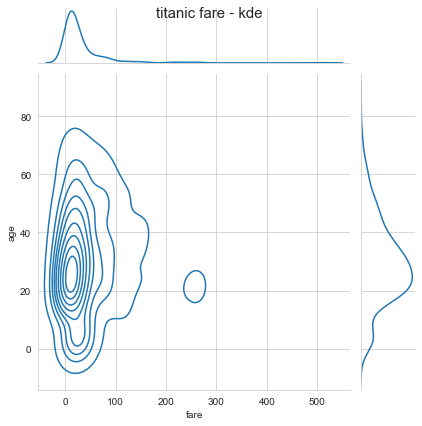

In [94]:
# 조인트 그래프 : 산점도 ( 기본값 )
j1 = sns.jointplot(
    x = 'fare',
    y = 'age',
    data = titanic
)
# 조인트 그래프 : 회귀선
j2 = sns.jointplot(
    x = 'fare',
    y = 'age',
    kind = 'reg',
    data = titanic
)
# 조인트 그래프 : 육각 그래프
j3 = sns.jointplot(
    x = 'fare',
    y = 'age',
    kind = 'hex',
    data = titanic
)
# 조인트 그래프 : 커널 밀집 그래프
j4 = sns.jointplot(
    x = 'fare',
    y = 'age',
    kind = 'kde',
    data = titanic
) # 제일 안에 있는게 제일 많이 모여있다. 

j1.fig.suptitle('titanic fare - scatter' , size = 15) # supertitle
j2.fig.suptitle('titanic fare - regression' , size = 15) 
j3.fig.suptitle('titanic fare - hex' , size = 15) 
j4.fig.suptitle('titanic fare - kde' , size = 15) 

plt.show()

---
### 조건을 적용하여 화면을 그리드로 분할하기

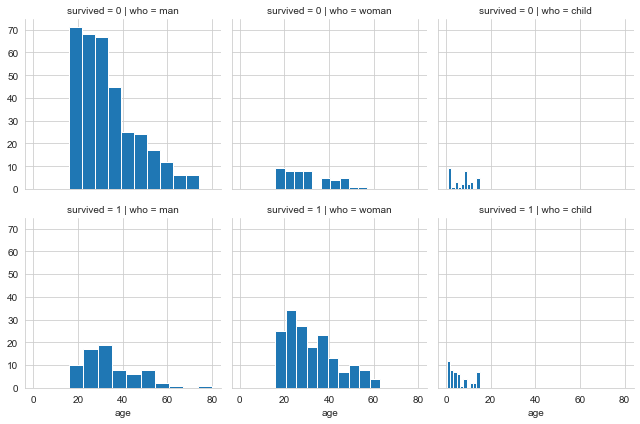

In [92]:
# 조건에 따라 Grid 나누기
g = sns.FacetGrid(
    data = titanic,
    col = 'who', # column , man, woman , child
    row = 'survived', # row , 1 , 0
)
# 3 X 2 = 6개 그래프 나옴 
g = g.map(plt.hist , 'age') # y축이 age

---
### 이변수 데이터 분포
- 매트릭스 형태로 짝을 지어 표현


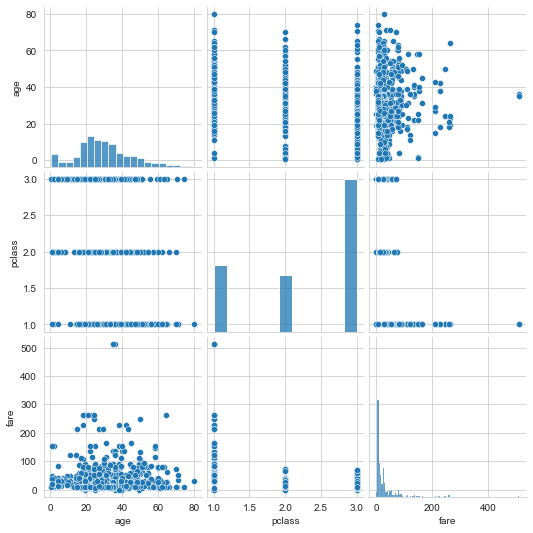

In [95]:
# titanic 데이터 셋 중에서 분석 데이터 선택하기
titanic_pair = titanic[{'age' , 'pclass' , 'fare'}]

# 조건에 따라 그리드 나누기
sns.pairplot(titanic_pair)

plt.show()

---